# Model developement to predict the rating of a movie

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [2]:
# Import the datasets
IMDB_only_combined = pd.read_csv('pre-processed_dataset/IMDB_only_combined.csv')
IMDB_Kaggle_common_combined = pd.read_csv('pre-processed_dataset/IMDB_Kaggle_common_combined.csv')

In [3]:
IMDB_only_combined.shape

(69458, 1087)

In [4]:
IMDB_Kaggle_common_combined.shape

(2585, 938)

In [5]:
X = IMDB_only_combined.drop(columns = ['avg_vote'])
y = IMDB_only_combined['avg_vote']

In [6]:
print(X.shape)
print(y.shape)

(69458, 1086)
(69458,)


In [7]:
y[:5]

0    5.9
1    6.1
2    5.2
3    7.0
4    5.7
Name: avg_vote, dtype: float64

In [8]:
y.describe()

count    69458.000000
mean         5.920526
std          1.218281
min          1.000000
25%          5.300000
50%          6.100000
75%          6.800000
max          9.800000
Name: avg_vote, dtype: float64

In [9]:
X.duration_min[:5]

0   -3.038251
1   -1.625160
2    0.070550
3   -1.738207
4   -2.190396
Name: duration_min, dtype: float64

In [10]:
X.votes[:5]

0   -0.436021
1   -0.385392
2   -0.402036
3   -0.193585
4   -0.397613
Name: votes, dtype: float64

In [11]:
X.reviews_from_users[:5]

0   -0.611759
1   -0.474345
2   -0.062103
3    0.075311
4   -0.336931
Name: reviews_from_users, dtype: float64

## train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
print(X_train.shape)
print(X_test.shape)

(48620, 1086)
(20838, 1086)


In [14]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_predict = lr1.predict(X_test)

In [15]:
lr1.intercept_

6.381541415903566

In [16]:
lr1.coef_

array([-9.89797748e-06,  1.86105536e-01,  2.50830931e-01, ...,
        5.56921515e-01, -6.95399765e-02, -2.78332132e-02])

In [17]:
r2_score(y_test, y_predict)

0.4448867467673735

<function matplotlib.pyplot.show(close=None, block=None)>

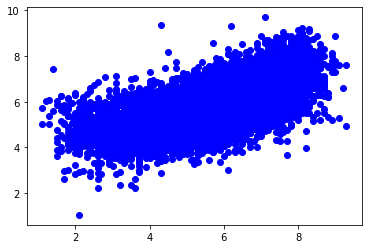

In [18]:
# plot the y_test and y_predict
plt.scatter(y_test,y_predict,  color = 'b')
plt.show

In [19]:
from sklearn.metrics import mean_squared_error
print("The mean squared error:", mean_squared_error(y_test, y_predict))

from sklearn.metrics import mean_squared_error
print("The root mean squared error:", mean_squared_error(y_test, y_predict, squared = False))

from sklearn.metrics import mean_absolute_error
print("The mean absolute error:", mean_absolute_error(y_test, y_predict))

The mean squared error: 0.8132585612269958
The root mean squared error: 0.9018084947631597
The mean absolute error: 0.6859178676232769


In [20]:
# Use k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#kf = KFold(n_split = 5)
scores = cross_val_score(lr1, X_train, y_train, cv=5)
scores

array([-9.91591032e+09,  4.37032870e-01,  4.37236535e-01,  4.38979426e-01,
        4.24663521e-01])

In [21]:
np.mean(scores), np.std(scores)

(-1983182064.0035267, 3966364128.87601)

# Model optimization

In [22]:
# Select the features to build a good model
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
pipe = make_pipeline(SelectKBest(score_func = f_regression, k=10), lr1) # f_regression: effect of each features on target
pipe.fit(X_train, y_train)

y_train_predict = pipe.predict(X_train)
y_test_predict = pipe.predict(X_test)

#k = [k+1 for k in len(X.columns)] # K is the number of features column
#grid_params = {'selectbest_K': k}

#from sklearn.model_selection import GridSearchCV
#GridSearchCV(pipe, param_grid = grid_params, cv = 5, n_jobs = -1)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [23]:
r2_score(y_train, y_train_predict), r2_score(y_test, y_test_predict)

(0.354823109409963, 0.3645921862038263)

In [24]:
mean_absolute_error(y_train, y_train_predict), mean_absolute_error(y_test, y_test_predict)

(0.7448172177505605, 0.735041024942662)

**<font color = 'teal'> Make model with 50 features**

In [25]:
pipe = make_pipeline(SelectKBest(score_func = f_regression, k=50), lr1) #f_regression: effect of each features on target
pipe.fit(X_train, y_train)

y_train_predict2 = pipe.predict(X_train)
y_test_predict2 = pipe.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [26]:
r2_score(y_train, y_train_predict2), r2_score(y_test, y_test_predict2)

(0.39932619016671145, 0.4037194943603064)

In [27]:
mean_absolute_error(y_train, y_train_predict2), mean_absolute_error(y_test, y_test_predict2)

(0.7167484678207113, 0.7100653031459672)

**<font color = 'teal'> Make model with 100 features**

In [28]:
pipe = make_pipeline(SelectKBest(score_func = f_regression, k=100), lr1) #f_regression: effect of each features on target
pipe.fit(X_train, y_train)

y_train_predict3 = pipe.predict(X_train)
y_test_predict3 = pipe.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [29]:
r2_score(y_train, y_train_predict3), r2_score(y_test, y_test_predict3)

(0.4177424209907231, 0.41902704927124756)

In [30]:
mean_absolute_error(y_train, y_train_predict3), mean_absolute_error(y_test, y_test_predict3)

(0.7058198890791764, 0.7015025372699702)

**<font color = 'teal'> Make model with 200 features**

In [31]:
pipe = make_pipeline(SelectKBest(score_func = f_regression, k=200), lr1) #f_regression: effect of each features on target
pipe.fit(X_train, y_train)

y_train_predict200 = pipe.predict(X_train)
y_test_predict200 = pipe.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [32]:
r2_score(y_train, y_train_predict200), r2_score(y_test, y_test_predict200)

(0.43047345687755356, 0.42755321022454906)

In [33]:
mean_absolute_error(y_train, y_train_predict200), mean_absolute_error(y_test, y_test_predict200)

(0.6976078183466193, 0.6967922060185107)

**<font color = 'teal'> Make model with 300 features**

In [34]:
pipe = make_pipeline(SelectKBest(score_func = f_regression, k=300), lr1) #f_regression: effect of each features on target
pipe.fit(X_train, y_train)

y_train_predict300 = pipe.predict(X_train)
y_test_predict300 = pipe.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [35]:
r2_score(y_train, y_train_predict300), r2_score(y_test, y_test_predict300)

(0.4360459461443741, 0.4324607773513025)

In [36]:
mean_absolute_error(y_train, y_train_predict300), mean_absolute_error(y_test, y_test_predict300)

(0.693423851121259, 0.6937194046146954)

In [37]:
pipe = make_pipeline(SelectKBest(score_func = f_regression, k=900), lr1) #f_regression: effect of each features on target
pipe.fit(X_train, y_train)

y_train_predict900 = pipe.predict(X_train)
y_test_predict900 = pipe.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [38]:
r2_score(y_train, y_train_predict900), r2_score(y_test, y_test_predict900)

(0.4528329200387502, 0.4429393446857003)

In [39]:
mean_absolute_error(y_train, y_train_predict900), mean_absolute_error(y_test, y_test_predict900)

(0.6812496082439861, 0.6871004317272662)

### Use GridSearchCV

In [40]:
#k = [400, 500, 600, 700, 800, 900, 1000, 1088]
k = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550,  600, 650, 700, 750, 800, 850, 900, 950, 1000, 1088]
grid_param = {'selectkbest__k': k}

In [41]:
lr1_grid_cv = GridSearchCV(pipe, param_grid = grid_param, cv = 5, n_jobs = -1)

In [42]:
lr1_grid_cv.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('selectkbest',
                                        SelectKBest(k=900,
                                                    score_func=<function f_regression at 0x00000264AF3B4488>)),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'selectkbest__k': [10, 50, 100, 150, 200, 250, 300,
                                            350, 400, 450, 500, 550, 600, 650,
                                            700, 750, 800, 850, 900, 950, 1000,
             

In [43]:
mean_score = lr1_grid_cv.cv_results_['mean_test_score']
std_score = lr1_grid_cv.cv_results_['std_test_score']
print(mean_score)
print(std_score)

[ 3.54127186e-01  3.96723258e-01  4.12931061e-01  4.19232058e-01
  4.22915473e-01  4.25499899e-01  4.26997637e-01  4.28172198e-01
  4.29761502e-01  4.31294252e-01  4.32162406e-01  4.33043713e-01
  4.33762537e-01  4.34453147e-01  4.34959405e-01  4.35055610e-01
  4.35065882e-01  4.35341383e-01  4.35537548e-01 -5.35061778e+07
 -1.61375051e+06             nan]
[7.90184676e-03 8.11779825e-03 8.07175512e-03 8.02579577e-03
 7.77475036e-03 6.76528477e-03 6.80963820e-03 6.99072626e-03
 6.68497485e-03 6.52007218e-03 6.51052899e-03 6.74716238e-03
 6.82752577e-03 6.83871907e-03 6.81868311e-03 6.53669278e-03
 6.05842070e-03 6.53138556e-03 6.00943308e-03 1.07012357e+08
 3.22750189e+06            nan]


In [44]:
lr1_grid_cv.best_params_

{'selectkbest__k': 900}

**<font color = 'teal'> The GridSearchCV shows that out of 1088 features, 900 features are best predictors.**

In [45]:
selected = lr1_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [46]:
coefs = lr1_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index = features).sort_values(ascending = False)[850:900]

Motion Picture Corporation of America (MPCA)   -0.456346
Claude Chabrol                                 -0.457669
Harry Alan Towers                              -0.462976
Constantin Film                                -0.468288
Egyptian (Ancient)                             -0.468513
 Sayaji Shinde                                 -0.486264
Albert Pyun                                    -0.510353
Fox 2000 Pictures                              -0.514647
Cannon Group                                   -0.517520
Robert Ellis                                   -0.519128
SVF Entertainment                              -0.520876
English                                        -0.530567
 Eric Roberts                                  -0.541817
Anees Bazmee                                   -0.549409
Eros International                             -0.549490
Vikram Bhatt.1                                 -0.561803
Antena 3 Televisión                            -0.567551
Jim Wynorski                   

In [47]:
#selected
#X_train[selected].shape

In [48]:
y_predict2 = lr1_grid_cv.predict(X_test)

In [49]:
r2_score(y_test, y_predict2)

0.4429393446857003

# Random Forest Model

In [50]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state = 42)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [51]:
y_predict3 = regr.predict(X_test)

In [52]:
r2_score(y_test, y_predict3)

0.527691451919158

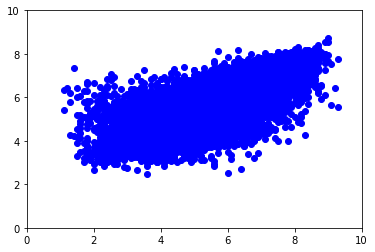

In [53]:
plt.scatter(y_test, y_predict3, color = 'b')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

**<font color = 'teal'> Note: The outputs from above two models show that Random Forest Regressor model performance is better than Linear Regresson model.**

# Gradient boosting 

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features= 900, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    
    print()

Learning rate:  0.05
Accuracy score (training): 0.213
Accuracy score (validation): 0.220

Learning rate:  0.1
Accuracy score (training): 0.317
Accuracy score (validation): 0.326

Learning rate:  0.25
Accuracy score (training): 0.426
Accuracy score (validation): 0.436

Learning rate:  0.5
Accuracy score (training): 0.462
Accuracy score (validation): 0.466

Learning rate:  0.75
Accuracy score (training): 0.468
Accuracy score (validation): 0.468

Learning rate:  1
Accuracy score (training): 0.456
Accuracy score (validation): 0.454



In [55]:
for learning_rate in learning_rates:
    gb2 = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features= 1000, max_depth = 2, random_state = 0)
    gb2.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb2.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb2.score(X_test, y_test)))
    
    print()

Learning rate:  0.05
Accuracy score (training): 0.217
Accuracy score (validation): 0.224

Learning rate:  0.1
Accuracy score (training): 0.318
Accuracy score (validation): 0.328

Learning rate:  0.25
Accuracy score (training): 0.427
Accuracy score (validation): 0.436

Learning rate:  0.5
Accuracy score (training): 0.462
Accuracy score (validation): 0.467

Learning rate:  0.75
Accuracy score (training): 0.467
Accuracy score (validation): 0.469

Learning rate:  1
Accuracy score (training): 0.461
Accuracy score (validation): 0.460



In [56]:
for learning_rate in learning_rates:
    gb2 = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features= 1086, max_depth = 2, random_state = 0)
    gb2.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb2.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb2.score(X_test, y_test)))
    
    print()

Learning rate:  0.05
Accuracy score (training): 0.218
Accuracy score (validation): 0.224

Learning rate:  0.1
Accuracy score (training): 0.320
Accuracy score (validation): 0.329

Learning rate:  0.25
Accuracy score (training): 0.430
Accuracy score (validation): 0.440

Learning rate:  0.5
Accuracy score (training): 0.465
Accuracy score (validation): 0.470

Learning rate:  0.75
Accuracy score (training): 0.467
Accuracy score (validation): 0.469

Learning rate:  1
Accuracy score (training): 0.461
Accuracy score (validation): 0.461



In [57]:
for learning_rate in learning_rates:
    gb2 = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features= 1086, max_depth = 5, random_state = 0)
    gb2.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb2.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb2.score(X_test, y_test)))
    
    print()

Learning rate:  0.05
Accuracy score (training): 0.362
Accuracy score (validation): 0.366

Learning rate:  0.1
Accuracy score (training): 0.459
Accuracy score (validation): 0.458

Learning rate:  0.25
Accuracy score (training): 0.524
Accuracy score (validation): 0.511

Learning rate:  0.5
Accuracy score (training): 0.545
Accuracy score (validation): 0.521

Learning rate:  0.75
Accuracy score (training): 0.548
Accuracy score (validation): 0.509

Learning rate:  1
Accuracy score (training): 0.537
Accuracy score (validation): 0.486



In [58]:
for learning_rate in learning_rates:
    gb6 = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features= 1086, max_depth = 6, random_state = 0)
    gb6.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb6.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb6.score(X_test, y_test)))
    
    print()

Learning rate:  0.05
Accuracy score (training): 0.393
Accuracy score (validation): 0.392

Learning rate:  0.1
Accuracy score (training): 0.488
Accuracy score (validation): 0.478

Learning rate:  0.25
Accuracy score (training): 0.549
Accuracy score (validation): 0.522

Learning rate:  0.5
Accuracy score (training): 0.567
Accuracy score (validation): 0.524

Learning rate:  0.75
Accuracy score (training): 0.571
Accuracy score (validation): 0.516

Learning rate:  1
Accuracy score (training): 0.569
Accuracy score (validation): 0.488



In [59]:
from sklearn.inspection import permutation_importance
feature_importance = gb2.feature_importances_

# Save the best model parameter for further use

In [60]:
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = gb2
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
#best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
#best_model.build_datetime = datetime.datetime.now()

In [61]:
# save the model
import os
import pickle
import library
from library.sb_utils import save_file
modelpath = '../models'
save_file(best_model, 'Best_model.pkl', modelpath)

ModuleNotFoundError: No module named 'library'